In [1]:
from pandas_datareader import wb
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Create dataframe of GDP per capita of China, Japan and KR
df = wb.download(indicator = ['NY.GDP.PCAP.KD', 'EN.CO2.MANF.ZS'], country = ['CN', 'JP', 'KR'], start = 2000, end = 2016)
print(df)

                  NY.GDP.PCAP.KD  EN.CO2.MANF.ZS
country     year                                
China       2016     6894.464522             NaN
            2015     6496.624013             NaN
            2014     6108.238775       31.715227
            2013     5721.693819       31.072303
            2012     5336.060143       32.053006
            2011     4971.544929       32.957118
            2010     4560.512586       33.448077
            2009     4142.038286       34.343978
            2008     3805.025999       33.933522
            2007     3487.845766       32.771231
            2006     3069.304781       31.845395
            2005     2738.205460       32.617407
            2004     2472.586556       31.376397
            2003     2258.912105       27.719599
            2002     2065.718579       28.172876
            2001     1905.610780       29.242298
            2000     1771.741506       28.936556
Japan       2016    47660.893039             NaN
            2015    

In [2]:
df = df.dropna()
df = df.reset_index()
df = df.set_index(['country', 'year'])
print(df)
print(df)

                  NY.GDP.PCAP.KD  EN.CO2.MANF.ZS
country     year                                
China       2014     6108.238775       31.715227
            2013     5721.693819       31.072303
            2012     5336.060143       32.053006
            2011     4971.544929       32.957118
            2010     4560.512586       33.448077
            2009     4142.038286       34.343978
            2008     3805.025999       33.933522
            2007     3487.845766       32.771231
            2006     3069.304781       31.845395
            2005     2738.205460       32.617407
            2004     2472.586556       31.376397
            2003     2258.912105       27.719599
            2002     2065.718579       28.172876
            2001     1905.610780       29.242298
            2000     1771.741506       28.936556
Japan       2014    46484.155267       19.180906
            2013    46249.209589       18.247398
            2012    45276.874335       18.524003
            2011    

In [3]:
df.rename({'NY.GDP.PCAP.KD': "GDP", 'EN.CO2.MANF.ZS': "CO2"}, axis = 1, inplace = True)
df.index.names = map(lambda x:x.title(), df.index.names)

print(df)

                           GDP        CO2
Country     Year                         
China       2014   6108.238775  31.715227
            2013   5721.693819  31.072303
            2012   5336.060143  32.053006
            2011   4971.544929  32.957118
            2010   4560.512586  33.448077
            2009   4142.038286  34.343978
            2008   3805.025999  33.933522
            2007   3487.845766  32.771231
            2006   3069.304781  31.845395
            2005   2738.205460  32.617407
            2004   2472.586556  31.376397
            2003   2258.912105  27.719599
            2002   2065.718579  28.172876
            2001   1905.610780  29.242298
            2000   1771.741506  28.936556
Japan       2014  46484.155267  19.180906
            2013  46249.209589  18.247398
            2012  45276.874335  18.524003
            2011  44538.726191  19.405174
            2010  44507.676386  19.833246
            2009  42724.760370  18.602940
            2008  45165.787919  19

In [4]:
dfc = df.loc['China']
dfc = dfc.sort_values(by = 'Year')
print(dfc)

              GDP        CO2
Year                        
2000  1771.741506  28.936556
2001  1905.610780  29.242298
2002  2065.718579  28.172876
2003  2258.912105  27.719599
2004  2472.586556  31.376397
2005  2738.205460  32.617407
2006  3069.304781  31.845395
2007  3487.845766  32.771231
2008  3805.025999  33.933522
2009  4142.038286  34.343978
2010  4560.512586  33.448077
2011  4971.544929  32.957118
2012  5336.060143  32.053006
2013  5721.693819  31.072303
2014  6108.238775  31.715227


In [5]:
#Normalize the data
dfc['GDP'] = (dfc['GDP'] - dfc['GDP'].mean())/dfc['GDP'].std()
dfc['CO2'] = (dfc['CO2'] - dfc['CO2'].mean())/dfc['CO2'].std()
print(dfc)
print(dfc['GDP'].corr(dfc['CO2']))

           GDP       CO2
Year                    
2000 -1.276188 -1.223809
2001 -1.184136 -1.076717
2002 -1.074041 -1.591215
2003 -0.941196 -1.809286
2004 -0.794267 -0.050004
2005 -0.611620  0.547045
2006 -0.383947  0.175631
2007 -0.096147  0.621050
2008  0.121955  1.180227
2009  0.353694  1.377697
2010  0.641449  0.946680
2011  0.924086  0.710480
2012  1.174737  0.275513
2013  1.439910 -0.196303
2014  1.705709  0.113008
0.5682473712839633


In [6]:
dfj = df.loc['Japan']
dfj = dfj.sort_values(by = 'Year')
print(dfj)

               GDP        CO2
Year                         
2000  42169.733284  20.647717
2001  42239.184926  20.336735
2002  42190.804873  20.172324
2003  42744.011285  19.858826
2004  43671.679974  20.381285
2005  44393.626384  20.499800
2006  44995.494492  21.622761
2007  45687.273815  20.064819
2008  45165.787919  19.484205
2009  42724.760370  18.602940
2010  44507.676386  19.833246
2011  44538.726191  19.405174
2012  45276.874335  18.524003
2013  46249.209589  18.247398
2014  46484.155267  19.180906


In [7]:
dfj['GDP'] = (dfj['GDP'] - dfj['GDP'].mean())/dfj['GDP'].std()
dfj['CO2'] = (dfj['CO2'] - dfj['CO2'].mean())/dfj['CO2'].std()
print(dfj)
print(dfj['GDP'].corr(dfj['CO2']))

           GDP       CO2
Year                    
2000 -1.362190  0.946320
2001 -1.315651  0.602889
2002 -1.348070  0.421323
2003 -0.977376  0.075113
2004 -0.355760  0.652088
2005  0.128004  0.782970
2006  0.531305  2.023103
2007  0.994855  0.302601
2008  0.645416 -0.338596
2009 -0.990275 -1.311816
2010  0.204427  0.046865
2011  0.225233 -0.425873
2012  0.719853 -1.398989
2013  1.371398 -1.704456
2014  1.528832 -0.673543
-0.34711331888566804


In [8]:
dfk = df.loc['Korea, Rep.']
dfk = dfk.sort_values(by = 'Year')
print(dfk)

               GDP        CO2
Year                         
2000  15104.521518  22.190823
2001  15667.378459  21.122779
2002  16734.845664  19.725518
2003  17136.661567  18.929665
2004  17905.225791  17.546722
2005  18568.362815  16.183253
2006  19427.189841  17.018620
2007  20385.320038  15.373494
2008  20803.500540  15.869281
2009  20843.134800  13.790768
2010  22086.952919  14.239288
2011  22724.705571  13.967153
2012  23123.761358  13.265076
2013  23685.406711  13.076305
2014  24323.572838  13.655976


In [9]:
#Normalize them
dfk['GDP'] = (dfk['GDP'] - dfk['GDP'].mean())/dfk['GDP'].std()
dfk['CO2'] = (dfk['CO2'] - dfk['CO2'].mean())/dfk['CO2'].std()
print(dfk)
print(dfk['GDP'].corr(dfk['CO2']))

           GDP       CO2
Year                    
2000 -1.614824  1.961269
2001 -1.425342  1.599726
2002 -1.065987  1.126740
2003 -0.930719  0.857337
2004 -0.671987  0.389198
2005 -0.448747 -0.072349
2006 -0.159629  0.210431
2007  0.162918 -0.346460
2008  0.303696 -0.178632
2009  0.317039 -0.882227
2010  0.735761 -0.730399
2011  0.950456 -0.822519
2012  1.084795 -1.060179
2013  1.273869 -1.124080
2014  1.488703 -0.927855
-0.9558443946283318


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


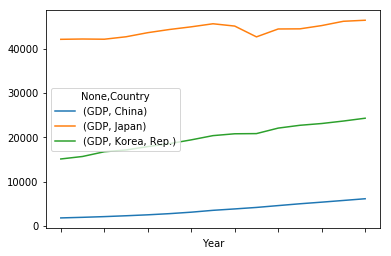

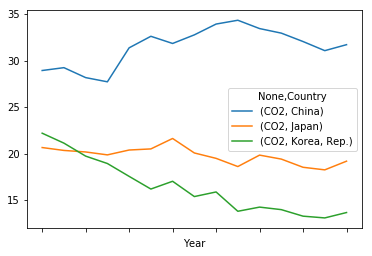

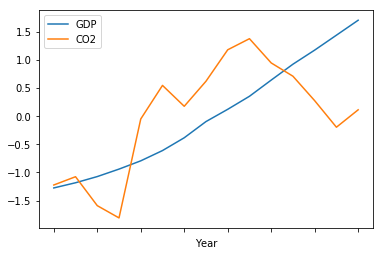

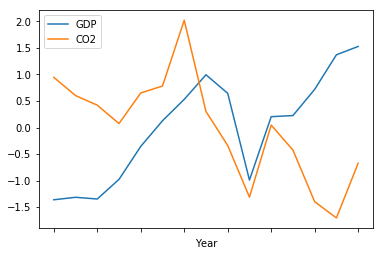

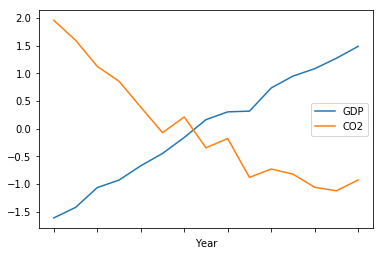

In [10]:
#Andrews plot
from pandas.plotting import andrews_curves
plt.figure()
#Plot by GDP
print(df.unstack(level = 0).drop(columns = 'CO2').plot())
#Plot by CO2
print(df.unstack(level = 0).drop(columns = 'GDP').plot())
#Plot normalized graphs
dfc.plot()
dfj.plot()
dfk.plot()

In [11]:
#Measure anomalies in the time series

NameError: name 'C' is not defined